In [1]:
from dolfin import *
from matplotlib import pyplot as plt
import numpy as np

In [2]:
msh = RectangleMesh(Point(0,0), Point(50000, 8000), 50, 8)

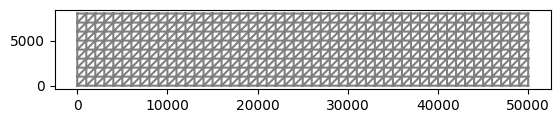

In [3]:
plot(msh)

In [4]:
node_num = msh.num_vertices()
node_xy = msh.coordinates()
elem_num = msh.num_cells()
elem_node = msh.cells()
bathy = 5.0

In [5]:
node_file = open('1D.14', 'w')
node_file.write('1D channel from FENICS\n')
node_file.write('%6d %6d \n' %(elem_num,node_num))
i = 1
for row in node_xy:
    node_file.write('%10d'%(i))
    for column in row:
        node_file.write( ' %15.10f' % column )
    node_file.write(' %15.10f\n' % bathy)
    i=i+1
    
i=1
for elem in elem_node:
    node_file.write('%5d'%(i))
    node_file.write(' %4d'%(len(elem)))
    if i%2 ==0:
        #need to flip nodes 2 and 3 of even elements to make CCW
        temp=elem[1]
        elem[1]=elem[2]
        elem[2]=temp

    for column in elem:
        column=column+1
        node_file.write(' %5d' % column)
    node_file.write('\n')
    i=i+1
    
node_file.close()